In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


Train shape: (1460, 81)
Test shape: (1459, 80)


🔹 Train preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  

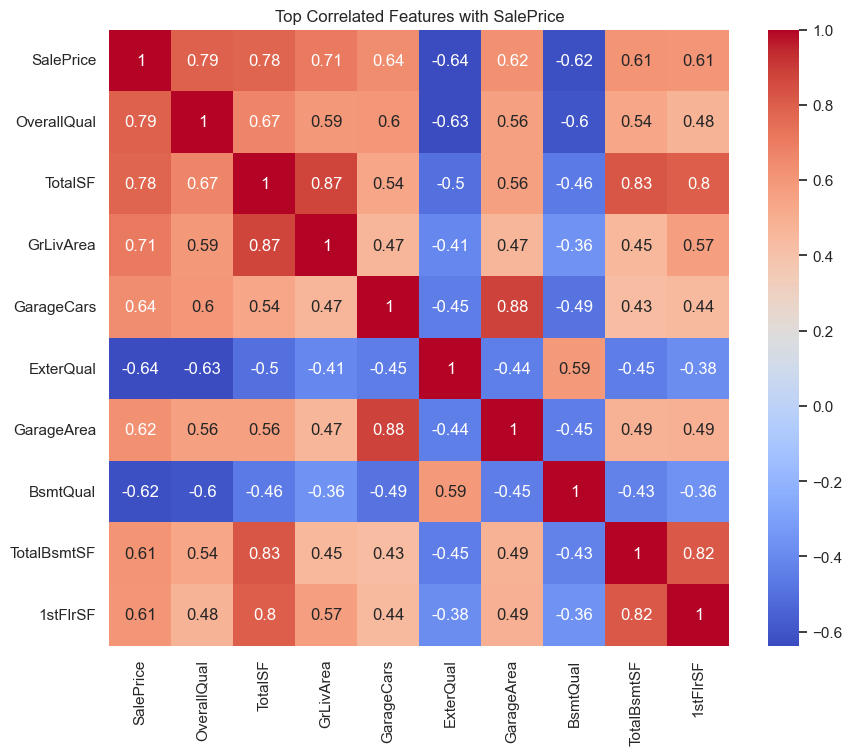

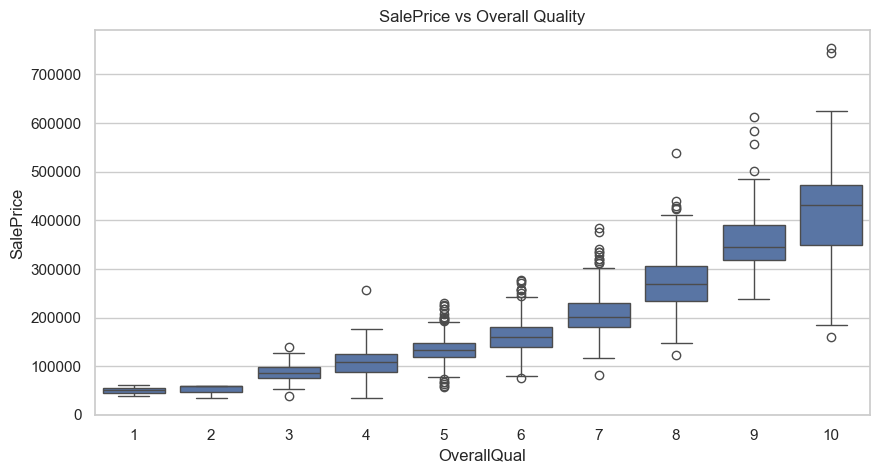

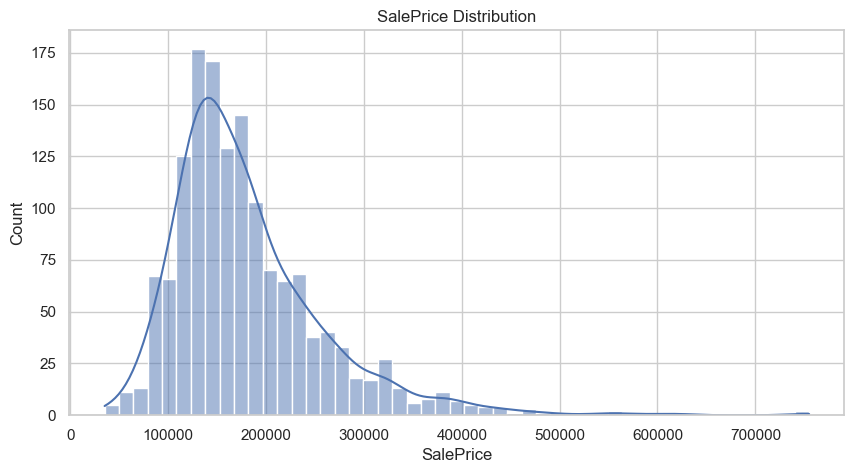

Data Preprocessing and Feature Engineering Complete


In [3]:
# House Prices - Data Preprocessing and Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style="whitegrid")

# Step 1: Load the dataset (CSV assumed to be in same directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

# Step 2: Initial data inspection
print("\n🔹 Train preview:")
print(train.head())

print("\n🔹 Test preview:")
print(test.head())

# Step 3: Handle missing values
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print("\n🔸 Missing values in training set:")
print(missing_train)

# Drop columns with too many missing values
train = train.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], errors='ignore')
test = test.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], errors='ignore')

# Fill missing values
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(test.median(numeric_only=True), inplace=True)

# Fill categorical features with mode
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].fillna(train[col].mode()[0])
    if col in test.columns:
        test[col] = test[col].fillna(test[col].mode()[0])

# Step 4: Encode categorical variables
cat_cols = train.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])
    if col in test.columns:
        test[col] = encoder.transform(test[col])

# Step 5: Feature Engineering - create new features
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]

# Step 6: Visualization - Correlation Heatmap
numeric_cols = train.select_dtypes(include=[np.number]).drop(columns=["Id"], errors="ignore")
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 1]  # Drop constant columns
corr = numeric_cols.corr()
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols[top_corr].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with SalePrice")
plt.show()

# Step 7: Boxplot - SalePrice vs OverallQual
plt.figure(figsize=(10, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train)
plt.title("SalePrice vs Overall Quality")
plt.show()

# Step 8: Histogram of SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(train["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()

print("Data Preprocessing and Feature Engineering Complete")